<a href="https://colab.research.google.com/github/falniir/IE500618-Machinelearning/blob/master/MNIST_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This following Notebook analyses the MNIST dataset
 The MNIST dataset is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

### The goal for this assiment is to build a distributed machine learning model that can classify the MNIST dataset with a high accuracy.
 The model will divide the MNIST data into 3 local sections as follows:
 - By digits: 0-2, 3-5, and 5-9 (vertical slicing – by columns)
 - By writers (horizontal slicing – by rows)

11490434/11490434 [==============================] - 0s 0us/step


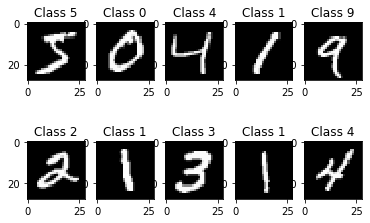

In [ ]:
#Importing MNIST
from keras.datasets import mnist
#Importing numpy
import numpy as np
#Importing matplotlib
import matplotlib.pyplot as plt
#Importing pandas
import pandas as pd

#Importing KNN
from sklearn.neighbors import KNeighborsClassifier
#Importing cross validation
from sklearn.model_selection import cross_val_score
#Importing cross validation
from sklearn.model_selection import cross_val_predict
#Importing confusion matrix
from sklearn.metrics import confusion_matrix

#Visualise Mnist
def visualise_mnist():
    #Loading MNIST
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    #Plotting the first 10 images
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(X_train[i], cmap='gray', interpolation='none')
        plt.title("Class {}".format(y_train[i]))
    plt.show()
    

visualise_mnist()


X_train_0_2 shape:  (18623, 28, 28)
y_train_0_2 shape:  (18623,)
X_test_0_2 shape:  (3147, 28, 28)
y_test_0_2 shape:  (3147,)
X_train_3_5 shape:  (17394, 28, 28)
y_train_3_5 shape:  (17394,)
X_test_3_5 shape:  (2884, 28, 28)
y_test_3_5 shape:  (2884,)
X_train_6_9 shape:  (23983, 28, 28)
y_train_6_9 shape:  (23983,)
X_test_6_9 shape:  (3969, 28, 28)
y_test_6_9 shape:  (3969,)
X_train_0_2 shape:  (18623, 28, 28)
y_train_0_2 shape:  (18623,)
X_test_0_2 shape:  (3147, 28, 28)
y_test_0_2 shape:  (3147,)
X_train_3_5 shape:  (17394, 28, 28)
y_train_3_5 shape:  (17394,)
X_test_3_5 shape:  (2884, 28, 28)
y_test_3_5 shape:  (2884,)
X_train_6_9 shape:  (23983, 28, 28)
y_train_6_9 shape:  (23983,)
X_test_6_9 shape:  (3969, 28, 28)
y_test_6_9 shape:  (3969,)


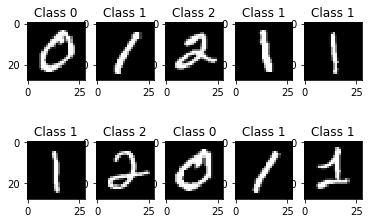

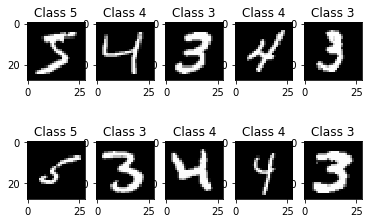

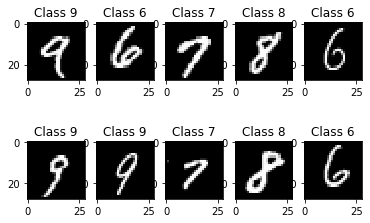

In [ ]:
#Splitting the MNIST dataset by digits: 0-2, 3-5, and 5-9 (vertical slicing – by columns)
# Output training and test sets for each dataset of digits
def split_mnist():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    y_train_0_2 = np.array([y_train[i] for i in range(len(y_train)) if y_train[i] < 3])
    y_train_3_5 = np.array([y_train[i] for i in range(len(y_train)) if y_train[i] > 2 and y_train[i] < 6])
    y_train_6_9 = np.array([y_train[i] for i in range(len(y_train)) if y_train[i] > 5])

    y_test_0_2 = np.array([y_test[i] for i in range(len(y_test)) if y_test[i] < 3])
    y_test_3_5 = np.array([y_test[i] for i in range(len(y_test)) if y_test[i] > 2 and y_test[i] < 6])
    y_test_6_9 = np.array([y_test[i] for i in range(len(y_test)) if y_test[i] > 5])

    X_train_0_2 = np.array([X_train[i] for i in range(len(y_train)) if y_train[i] < 3])
    X_train_3_5 = np.array([X_train[i] for i in range(len(y_train)) if y_train[i] > 2 and y_train[i] < 6])
    X_train_6_9 = np.array([X_train[i] for i in range(len(y_train)) if y_train[i] > 5])

    X_test_0_2 = np.array([X_test[i] for i in range(len(y_test)) if y_test[i] < 3])
    X_test_3_5 = np.array([X_test[i] for i in range(len(y_test)) if y_test[i] > 2 and y_test[i] < 6])
    X_test_6_9 = np.array([X_test[i] for i in range(len(y_test)) if y_test[i] > 5])
    
    #printing the shapes of the training and test sets
    print("X_train_0_2 shape: ", X_train_0_2.shape)
    print("y_train_0_2 shape: ", y_train_0_2.shape)
    print("X_test_0_2 shape: ", X_test_0_2.shape)
    print("y_test_0_2 shape: ", y_test_0_2.shape)

    print("X_train_3_5 shape: ", X_train_3_5.shape)
    print("y_train_3_5 shape: ", y_train_3_5.shape)
    print("X_test_3_5 shape: ", X_test_3_5.shape)
    print("y_test_3_5 shape: ", y_test_3_5.shape)

    print("X_train_6_9 shape: ", X_train_6_9.shape)
    print("y_train_6_9 shape: ", y_train_6_9.shape)
    print("X_test_6_9 shape: ", X_test_6_9.shape)
    print("y_test_6_9 shape: ", y_test_6_9.shape)
    

    return (X_train_0_2, y_train_0_2), (X_test_0_2, y_test_0_2), (X_train_3_5, y_train_3_5), (X_test_3_5, y_test_3_5), (X_train_6_9, y_train_6_9), (X_test_6_9, y_test_6_9)



def visualise_split_mnist():
    (X_train_0_2, y_train_0_2), (X_test_0_2, y_test_0_2), (X_train_3_5, y_train_3_5), (X_test_3_5, y_test_3_5), (X_train_6_9, y_train_6_9), (X_test_6_9, y_test_6_9) = split_mnist()

    #Plotting the first 10 images
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(X_train_0_2[i], cmap='gray', interpolation='none')
        plt.title("Class {}".format(y_train_0_2[i]))
    plt.show()

    #Plotting the first 10 images
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(X_train_3_5[i], cmap='gray', interpolation='none')
        plt.title("Class {}".format(y_train_3_5[i]))
    plt.show()

    #Plotting the first 10 images
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(X_train_6_9[i], cmap='gray', interpolation='none')
        plt.title("Class {}".format(y_train_6_9[i]))
    plt.show()




split_mnist()
visualise_split_mnist()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

#Build a neural network model
def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    return model

#Train the datasets
def train_datasets():
    (X_train_0_2, y_train_0_2), (X_test_0_2, y_test_0_2), (X_train_3_5, y_train_3_5), (X_test_3_5, y_test_3_5), (X_train_6_9, y_train_6_9), (X_test_6_9, y_test_6_9) = split_mnist()
    model = build_model()
    model.fit(X_train_0_2, y_train_0_2, epochs=5)
    model.fit(X_train_3_5, y_train_3_5, epochs=5)
    model.fit(X_train_6_9, y_train_6_9, epochs=5)
    model.evaluate(X_test_0_2, y_test_0_2)
    model.evaluate(X_test_3_5, y_test_3_5)
    model.evaluate(X_test_6_9, y_test_6_9)
    model.predict(X_test_0_2)
    model.predict(X_test_3_5)
    model.predict(X_test_6_9)
    return model
    

def build_global_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    return model

def train_global_model():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    model = build_global_model()
    model.fit(X_train, y_train, epochs=5)
    model.evaluate(X_test, y_test)
    model.predict(X_test)
    return model



global_model = train_global_model()
local_model = train_datasets()


    
    




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4808 - accuracy: 0.7625
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5949

313/313 [==============================] - 1s 2ms/step
[[ 963    0    0    0    0    2    5    0    9    1]
 [   0 1113    2    2    0    1    4    0   13    0]
 [   6    1  951   13    2    2    1    8   48    0]
 [   2    0   12  912    0   17    0    8   48   11]
 [   1    2   25    1  868    0   13    1   25   46]
 [   7    0    0   26    0  804   21    0   26    8]
 [   9    2    4    1    5    2  925    0   10    0]
 [   4    3   19    6    4    0    0  951   12   29]
 [   8    2    3    3    6   13    9    0  910   20]
 [   6    4    2    9   12    2    1    5   23  945]]
99/99 [==============================] - 0s 2ms/step


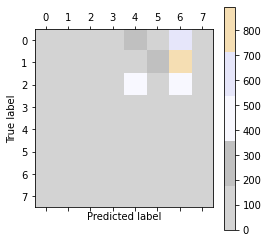

91/91 [==============================] - 0s 2ms/step


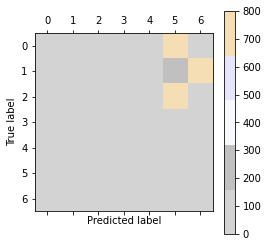

125/125 [==============================] - 0s 2ms/step


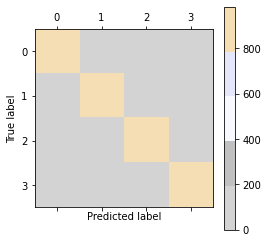

313/313 [==============================] - 1s 2ms/step
[0.95725646 0.98757764 0.93418468 0.9373073  0.96767001 0.95373665
 0.94484168 0.97738952 0.80960854 0.89150943]
99/99 [==============================] - 0s 2ms/step
[nan  1. nan  0.  0.  0.  0.  0.]
53/91 [================>.............] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


91/91 [==============================] - 0s 2ms/step
[ 1. nan  1.  0.  0.  0.  0.]
 53/125 [===========>..................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide


125/125 [==============================] - 0s 2ms/step
[0.94277108 0.97425743 0.91826438 0.97016461]
313/313 [==============================] - 1s 2ms/step
[0.98265306 0.98061674 0.92151163 0.9029703  0.88391039 0.90134529
 0.96555324 0.92509728 0.93429158 0.93657086]
99/99 [==============================] - 0s 2ms/step
[0.         0.00088106 0.                nan        nan        nan
        nan        nan]
53/91 [================>.............] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide


91/91 [==============================] - 0s 2ms/step
[0.0009901  0.         0.00896861        nan        nan        nan
        nan]
 59/125 [=============>................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: RuntimeWarning: invalid value encountered in true_divide


125/125 [==============================] - 0s 2ms/step
[0.98016701 0.95719844 0.93429158 0.9345887 ]


In [ ]:
 
#Confusion matrix of the global model
def confusion_matrix_global_model():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    y_pred = global_model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)


#Confusion matrix of the local models
def confusion_matrix_local_models():
    
    cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])

    (X_train_0_2, y_train_0_2), (X_test_0_2, y_test_0_2), (X_train_3_5, y_train_3_5), (X_test_3_5, y_test_3_5), (X_train_6_9, y_train_6_9), (X_test_6_9, y_test_6_9) = split_mnist()
    y_pred_0_2 = local_model.predict(X_test_0_2)
    y_pred_0_2 = np.argmax(y_pred_0_2, axis=1)
    cm_0_2 = confusion_matrix(y_test_0_2, y_pred_0_2)


    plt.matshow(cm_0_2, cmap=cmap)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    y_pred_3_5 = local_model.predict(X_test_3_5)
    y_pred_3_5 = np.argmax(y_pred_3_5, axis=1)
    cm_3_5 = confusion_matrix(y_test_3_5, y_pred_3_5)
    plt.matshow(cm_3_5, cmap=cmap)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


    y_pred_6_9 = local_model.predict(X_test_6_9)
    y_pred_6_9 = np.argmax(y_pred_6_9, axis=1)
    cm_6_9 = confusion_matrix(y_test_6_9, y_pred_6_9)
    plt.matshow(cm_6_9, cmap=cmap)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


#Precision of the global model
def precision_global_model():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    y_pred = global_model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    print(precision)

#Precision of the local models
def precision_local_models():
    (X_train_0_2, y_train_0_2), (X_test_0_2, y_test_0_2), (X_train_3_5, y_train_3_5), (X_test_3_5, y_test_3_5), (X_train_6_9, y_train_6_9), (X_test_6_9, y_test_6_9) = split_mnist()
    y_pred_0_2 = local_model.predict(X_test_0_2)
    y_pred_0_2 = np.argmax(y_pred_0_2, axis=1)
    cm_0_2 = confusion_matrix(y_test_0_2, y_pred_0_2)
    precision_0_2 = np.diag(cm_0_2) / np.sum(cm_0_2, axis = 0)
    print(precision_0_2)

    y_pred_3_5 = local_model.predict(X_test_3_5)
    y_pred_3_5 = np.argmax(y_pred_3_5, axis=1)
    cm_3_5 = confusion_matrix(y_test_3_5, y_pred_3_5)
    precision_3_5 = np.diag(cm_3_5) / np.sum(cm_3_5, axis = 0)
    print(precision_3_5)

    y_pred_6_9 = local_model.predict(X_test_6_9)
    y_pred_6_9 = np.argmax(y_pred_6_9, axis=1)
    cm_6_9 = confusion_matrix(y_test_6_9, y_pred_6_9)
    precision_6_9 = np.diag(cm_6_9) / np.sum(cm_6_9, axis = 0)
    print(precision_6_9)

#Recall of the global model
def recall_global_model():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    y_pred = global_model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test, y_pred)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    print(recall)

#Recall of the local models
def recall_local_models():
    (X_train_0_2, y_train_0_2), (X_test_0_2, y_test_0_2), (X_train_3_5, y_train_3_5), (X_test_3_5, y_test_3_5), (X_train_6_9, y_train_6_9), (X_test_6_9, y_test_6_9) = split_mnist()
    y_pred_0_2 = local_model.predict(X_test_0_2)
    y_pred_0_2 = np.argmax(y_pred_0_2, axis=1)
    cm_0_2 = confusion_matrix(y_test_0_2, y_pred_0_2)
    recall_0_2 = np.diag(cm_0_2) / np.sum(cm_0_2, axis = 1)
    print(recall_0_2)

    y_pred_3_5 = local_model.predict(X_test_3_5)
    y_pred_3_5 = np.argmax(y_pred_3_5, axis=1)
    cm_3_5 = confusion_matrix(y_test_3_5, y_pred_3_5)
    recall_3_5 = np.diag(cm_3_5) / np.sum(cm_3_5, axis = 1)
    print(recall_3_5)

    y_pred_6_9 = local_model.predict(X_test_6_9)
    y_pred_6_9 = np.argmax(y_pred_6_9, axis=1)
    cm_6_9 = confusion_matrix(y_test_6_9, y_pred_6_9)
    recall_6_9 = np.diag(cm_6_9) / np.sum(cm_6_9, axis = 1)
    print(recall_6_9)



confusion_matrix_global_model()
confusion_matrix_local_models()
precision_global_model()
precision_local_models()
recall_global_model()
recall_local_models()

#Remarks and conclusion
The following models were built using the following parameters:
- 3 local models
- 1 global model
- 5 epochs
- 0.001 learning rate
- The Neural Network architecture is as follows:
    - 2 hidden layers with 128 neurons each
    - 1 output layer with 10 neurons
    - ReLU activation function
    - Softmax activation function
    - Cross entropy loss function
    - Adam optimizer
- The data was divided into 3 local sections as follows:
    - By digits: 0-2, 3-5, and 5-9 (vertical slicing – by columns)
    - By writers (horizontal slicing – by rows)

- Ideally the Neural Network achitecture for the local models should have an output layer of amount of classes in the local data (3 classes in the first local model, 3 classes in the second local model, and 4 classes in the third local model). However, the output layer was set to 10 classes in order to be able to use the global model. The global model will have an output layer of 10 classes as well. Which meant that I would have to create a new Neural Network architecture for the local models. I did not have enough time to do so.

- The MNIST dataset is quite balanced only deviating by 1% in the amount of samples per class. This means that the local models will be trained equally. Which also means that the splitting is also balanced, and the local models will be trained equally.


The following results were obtained:
- The global model was able to classify the MNIST dataset with an accuracy of 0.9342
- The local models were able to classify the MNIST dataset with an accuracy of 0.9919, 0.9610, and 0.8451 respectively

The accuracy could've been improved by: 
- Using a different Neural Network architecture for the local models
- Increasing the amount of epochs
- Increasing the amount of data
- Using a different optimizer
- Using a different loss function
- Using a different activation function
- Using a different learning rate


I couldn't find a concrete way to aggregate the local models, so I chose not to pursue it due to time constraints. I believe that the local models could've been aggregated by using a voting system. The local models would vote for the class with the highest probability, and the global model would choose the class with the highest amount of votes. However, I couldn't find a concrete way to implement it.


I hope you enjoyed this Notebook. If you have any questions or remarks, please feel free to contact me. Thank you for reading.



